In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from copy import copy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC', 'Microsoft JhengHei', 'PMingLiU', 'Arial Unicode MS', 'SimHei']  # Pick whichever is available for traditional chinese characters
# plt.rcParams['axes.unicode_minus'] = False  # Show minus sign properly

In [18]:
df_exp = pd.read_csv("/Users/leo/Desktop/Project/ITRI_case/itri_analysis_result/dataset/experiment.csv")
df_fac = pd.read_csv("/Users/leo/Desktop/Project/ITRI_case/itri_analysis_result/dataset/factory.csv")

In [19]:
df_exp.loc[:, :'未知產物[%]'] = df_exp.loc[:, :'未知產物[%]'].fillna(0)
df_fac.loc[:, :'未知產物[%]'] = df_fac.loc[:, :'未知產物[%]'].fillna(0)

In [20]:
# Select columns that includs number
numeric_df_exp = df_exp.select_dtypes(include='number')
numeric_df_fac = df_fac.select_dtypes(include='number')

In [21]:
thresheld = 0.1  # Setting a variance threshold to decide which columns to keep

data = copy(numeric_df_exp.loc[:, :'反應時間[hr]']) # Only check X variables
var = data.var() # Get variance
X_col = data.columns
variable = X_col[var >=thresheld] # Find columns to keep where the variance is equal to or greater than the threshold
X_exp = data[variable]

data = copy(numeric_df_fac.loc[:, :'反應時間[hr]']) #only check X variables
var = data.var()
X_col = data.columns
variable = X_col[var >=thresheld] #find columns to keep
X_fac = data[variable]

In [22]:
df_exp = pd.concat([X_exp, numeric_df_exp.loc[:, '轉化率[%]':]], axis=1)
df_fac = pd.concat([X_fac, numeric_df_fac.loc[:, '轉化率[%]':]], axis=1)

In [23]:
df_exp

,反應器規格_mL,pc_白色防雲處理料源,pc_塊料,pc_透明料,pc_前三者混合,pc_彩色料,Methanol,Ethanol,ethylene glycol,propylene glycol,...,Acetic acid,反應時間[hr],轉化率[%],選擇率[%],副產物_4-tert-butylphenol[%],未知產物[%],理論產物重[kg],實際產物重[g],產率[%],純度[%]
0,500,50.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,...,1.0,1.0,99.000,97.985,2.015,0,44.64,43.26,0.97,99.045
1,500,0.0,50.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,...,1.0,1.0,99.000,97.584,2.416,0,44.64,42.95,0.96,99.214
2,500,0.0,0.0,60.0,0.0,0.0,60.0,0.0,0.0,0.0,...,1.2,1.0,99.000,98.140,1.860,0,53.85,51.02,0.95,99.155
3,500,0.0,0.0,0.0,50.0,0.0,0.0,50.0,0.0,0.0,...,1.0,20.0,99.000,98.225,1.775,0,44.64,43.05,0.96,99.112
4,500,0.0,0.0,0.0,50.0,0.0,0.0,50.0,0.0,0.0,...,4.0,20.0,50.254,95.485,4.515,0,44.64,NaN,NaN,NaN
5,500,0.0,0.0,0.0,50.0,0.0,0.0,50.0,0.0,0.0,...,7.0,20.0,54.236,97.254,2.746,0,44.64,NaN,NaN,NaN
6,5000,0.0,0.0,0.0,500.0,0.0,500.0,0.0,0.0,0.0,...,10.0,0.5,99.000,97.621,2.379,0,446.40,437.52,0.98,98.784
7,5000,0.0,0.0,0.0,500.0,0.0,500.0,0.0,0.0,0.0,...,10.0,0.5,99.000,98.062,1.938,0,446.40,432.84,0.97,99.005
8,500,0.0,0.0,0.0,50.0,0.0,50.0,0.0,0.0,0.0,...,1.0,0.5,99.000,97.142,2.858,0,44.64,31.24,0.70,97.423
9,500,0.0,0.0,0.0,50.0,0.0,50.0,0.0,0.0,0.0,...,1.0,0.5,99.000,97.582,2.418,0,44.64,24.99,0.56,99.489


In [24]:
df_fac

,反應器規格[mL],pc_前三者混合,Methanol,Tetrahydrofuran,sodium hydroxide,Water,Acetic acid,反應溫度[degC],反應時間[hr],轉化率[%],選擇率[%],副產物_4-tert-butylphenol[%],未知產物[%],理論產物重[kg],實際產物重[kg],產率[%],純度[%]
0,50000,5.00,5.00,10.00,100.00,10,170.00,60.1,2.0,99,98.227,1.773,0.000,4.32,2.00,0.46,99.999
1,200000,35.00,34.92,68.08,700.00,35,700.00,65.0,1.5,99,98.010,1.990,0.000,30.28,29.00,0.96,99.200
2,200000,34.96,35.16,70.00,700.00,35,1012.70,69.1,0.5,99,97.878,2.122,0.000,30.28,28.52,0.94,99.055
3,200000,35.00,35.00,70.00,700.00,35,700.00,60.2,1.5,99,97.867,2.133,0.000,30.28,28.52,0.94,99.287
4,200000,35.64,35.00,70.04,700.23,0,1012.56,63.0,2.0,99,73.556,2.151,24.293,NaN,NaN,NaN,74.589
5,200000,35.06,35.00,70.02,700.00,0,1165.80,63.4,1.5,99,98.019,1.981,0.000,30.28,24.84,0.82,99.999
6,200000,35.00,30.00,60.00,600.18,0,902.43,63.5,1.0,99,97.733,2.267,0.000,25.95,25.40,0.98,99.498
7,200000,30.00,30.00,60.00,600.02,0,1061.43,65.0,1.5,99,97.945,2.055,0.000,25.95,21.40,0.82,99.657
8,2000000,160.00,159.59,319.71,3200.11,0,4296.50,60.0,1.0,99,98.197,1.803,0.000,138.42,80.29,0.58,99.137


In [25]:
# In experiment data, the important y in index 4, 5 are all Nan, so delete these two records
df_exp_2 = df_exp.drop(index=[4, 5])
df_exp_2.isna().any().any()

False

In [26]:
# In factory data, the reaction in index 4 is failed, so delete this record
df_fac_2 = df_fac.drop(index=4)
df_fac_2.isna().any().any()

False

In [27]:
df_exp_2

,反應器規格_mL,pc_白色防雲處理料源,pc_塊料,pc_透明料,pc_前三者混合,pc_彩色料,Methanol,Ethanol,ethylene glycol,propylene glycol,...,Acetic acid,反應時間[hr],轉化率[%],選擇率[%],副產物_4-tert-butylphenol[%],未知產物[%],理論產物重[kg],實際產物重[g],產率[%],純度[%]
0,500,50.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,...,1.0,1.0,99.0,97.985,2.015,0,44.64,43.26,0.97,99.045
1,500,0.0,50.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,...,1.0,1.0,99.0,97.584,2.416,0,44.64,42.95,0.96,99.214
2,500,0.0,0.0,60.0,0.0,0.0,60.0,0.0,0.0,0.0,...,1.2,1.0,99.0,98.140,1.860,0,53.85,51.02,0.95,99.155
3,500,0.0,0.0,0.0,50.0,0.0,0.0,50.0,0.0,0.0,...,1.0,20.0,99.0,98.225,1.775,0,44.64,43.05,0.96,99.112
6,5000,0.0,0.0,0.0,500.0,0.0,500.0,0.0,0.0,0.0,...,10.0,0.5,99.0,97.621,2.379,0,446.40,437.52,0.98,98.784
7,5000,0.0,0.0,0.0,500.0,0.0,500.0,0.0,0.0,0.0,...,10.0,0.5,99.0,98.062,1.938,0,446.40,432.84,0.97,99.005
8,500,0.0,0.0,0.0,50.0,0.0,50.0,0.0,0.0,0.0,...,1.0,0.5,99.0,97.142,2.858,0,44.64,31.24,0.70,97.423
9,500,0.0,0.0,0.0,50.0,0.0,50.0,0.0,0.0,0.0,...,1.0,0.5,99.0,97.582,2.418,0,44.64,24.99,0.56,99.489
10,500,0.0,0.0,0.0,50.0,0.0,50.0,0.0,0.0,0.0,...,1.0,0.5,99.0,97.412,2.588,0,44.64,24.05,0.54,99.024
11,500,0.0,0.0,0.0,50.0,0.0,50.0,0.0,0.0,0.0,...,1.0,0.5,99.0,98.290,1.710,0,44.64,41.06,0.92,99.141


In [28]:
X_exp = df_exp_2.loc[:, :'反應時間[hr]']
y_exp = df_exp_2.loc[:, '轉化率[%]':]
X_fac = df_fac_2.loc[:, :'反應時間[hr]']
y_fac = df_fac_2.loc[:, '轉化率[%]':]

Evaluate experiment dataset

Experiment dataset Hold-Out Performance:


,轉化率[%],選擇率[%],副產物_4-tert-butylphenol[%],未知產物[%],理論產物重[kg],實際產物重[g],產率[%],純度[%]
mse,0.0,0.148,0.148,0.0,0.0,68.943,0.034,0.160
r2,1.0,-1.017,-1.017,1.0,1.0,0.998,0.013,-22.111


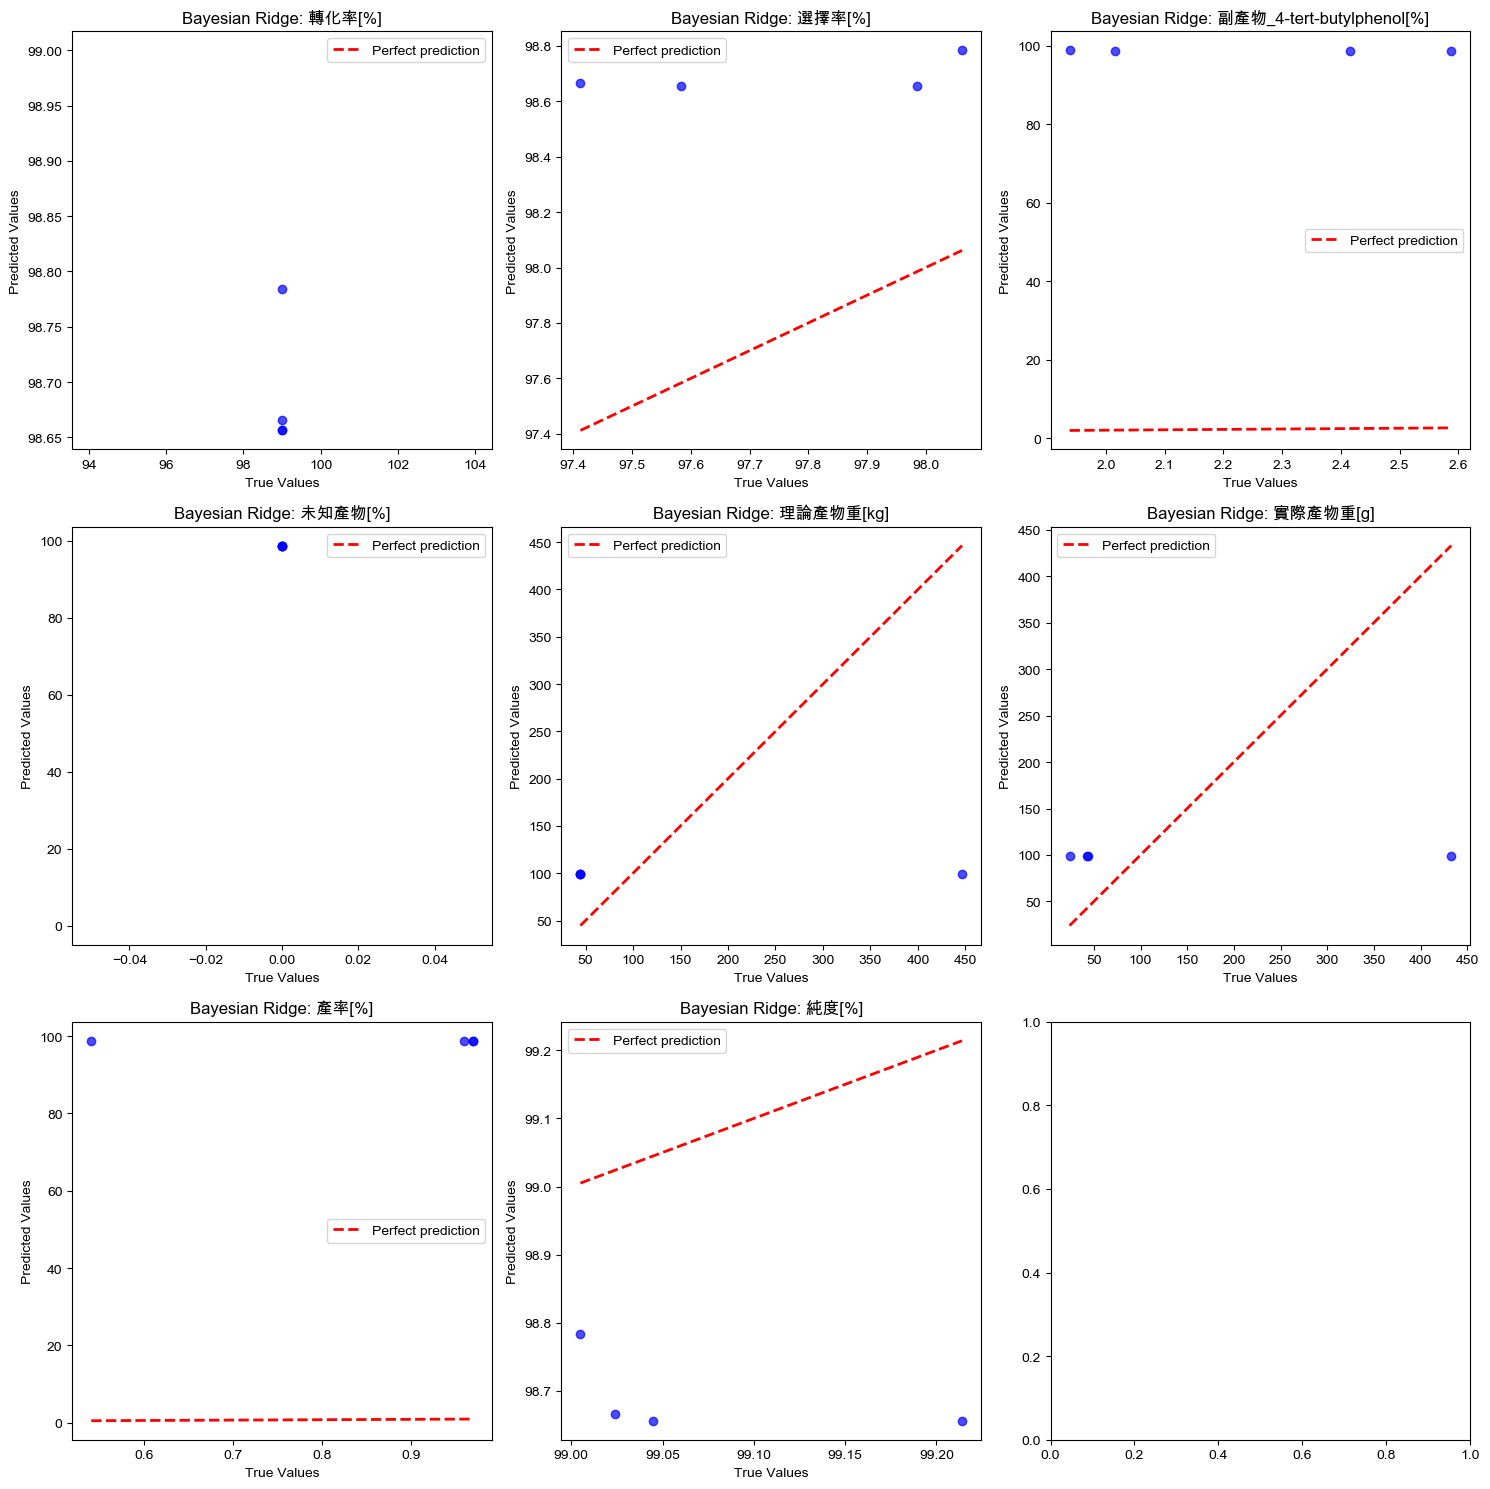

In [29]:
# 学習用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X_exp, y_exp, test_size=0.2, random_state=42)

exp_result = {}

for y_name in y_exp.columns:
    # モデル学習
    model = BayesianRidge()
    model.fit(X_train, y_train[y_name])
    # print(y_train[y_name])

    y_pred = model.predict(X_test)

    # 精度評価
    mse = mean_squared_error(y_test[y_name], y_pred)
    r2 = r2_score(y_test[y_name], y_pred)

    exp_result[y_name] = {
        'mse': mse.round(3),
        'r2': r2.round(3)
    }


print("Experiment dataset Hold-Out Performance:")
display(pd.DataFrame(exp_result))

# 実測値 vs 予測値 の可視化
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, y_name in enumerate(y_exp.columns):
    ax = axes[i // 3, i % 3]
    ax.scatter(y_test[y_name], y_pred, color="blue", alpha=0.7)
    ax.plot([y_test[y_name].min(), y_test[y_name].max()],
            [y_test[y_name].min(), y_test[y_name].max()],
            "r--", lw=2, label="Perfect prediction")
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(f"Bayesian Ridge: {y_name}")
    ax.legend()
plt.tight_layout()
plt.show()

In [33]:
# Since data is less, try LOO
loo = LeaveOneOut()
exp_loo_result = {}

for y_name in y_exp.columns:
    y_true_all = []
    y_pred_all = []
    
    for train_idx, test_idx in loo.split(X_exp, y_exp[y_name]):
        # LOO split
        X_train, X_test = X_exp.iloc[train_idx], X_exp.iloc[test_idx]
        y_train, y_test = y_exp[y_name].iloc[train_idx], y_exp[y_name].iloc[test_idx]
        
        # モデル学習
        model = BayesianRidge()
        model.fit(X_train, y_train)
        
        # 予測
        y_pred = model.predict(X_test)
        
        # 結果を蓄積
        y_true_all.append(y_test.values[0])
        y_pred_all.append(y_pred[0])
    
    # 全サンプルのLOO予測でスコア算出
    mse = mean_squared_error(y_true_all, y_pred_all)
    r2 = r2_score(y_true_all, y_pred_all)
    
    exp_loo_result[y_name] = {
        'mse': round(mse, 3),
        'r2': round(r2, 3)
    }

print("Experiment dataset Leave One Out Performance:")
display(pd.DataFrame(exp_loo_result))

Experiment dataset Leave One Out Performance:


,轉化率[%],選擇率[%],副產物_4-tert-butylphenol[%],未知產物[%],理論產物重[kg],實際產物重[g],產率[%],純度[%]
mse,0.0,0.142,0.142,0.0,4.388,66.561,0.025,0.48
r2,1.0,-0.201,-0.201,1.0,1.000,0.996,-0.063,-0.31


Evaluate factory dataset

Factory dataset Hold-Out Performance:


,轉化率[%],選擇率[%],副產物_4-tert-butylphenol[%],未知產物[%],理論產物重[kg],實際產物重[kg],產率[%],純度[%]
mse,0.0,0.125,0.125,0.0,0.0,128.606,0.065,0.585
r2,1.0,-2.067,-2.067,1.0,1.0,0.102,-0.117,-4.387


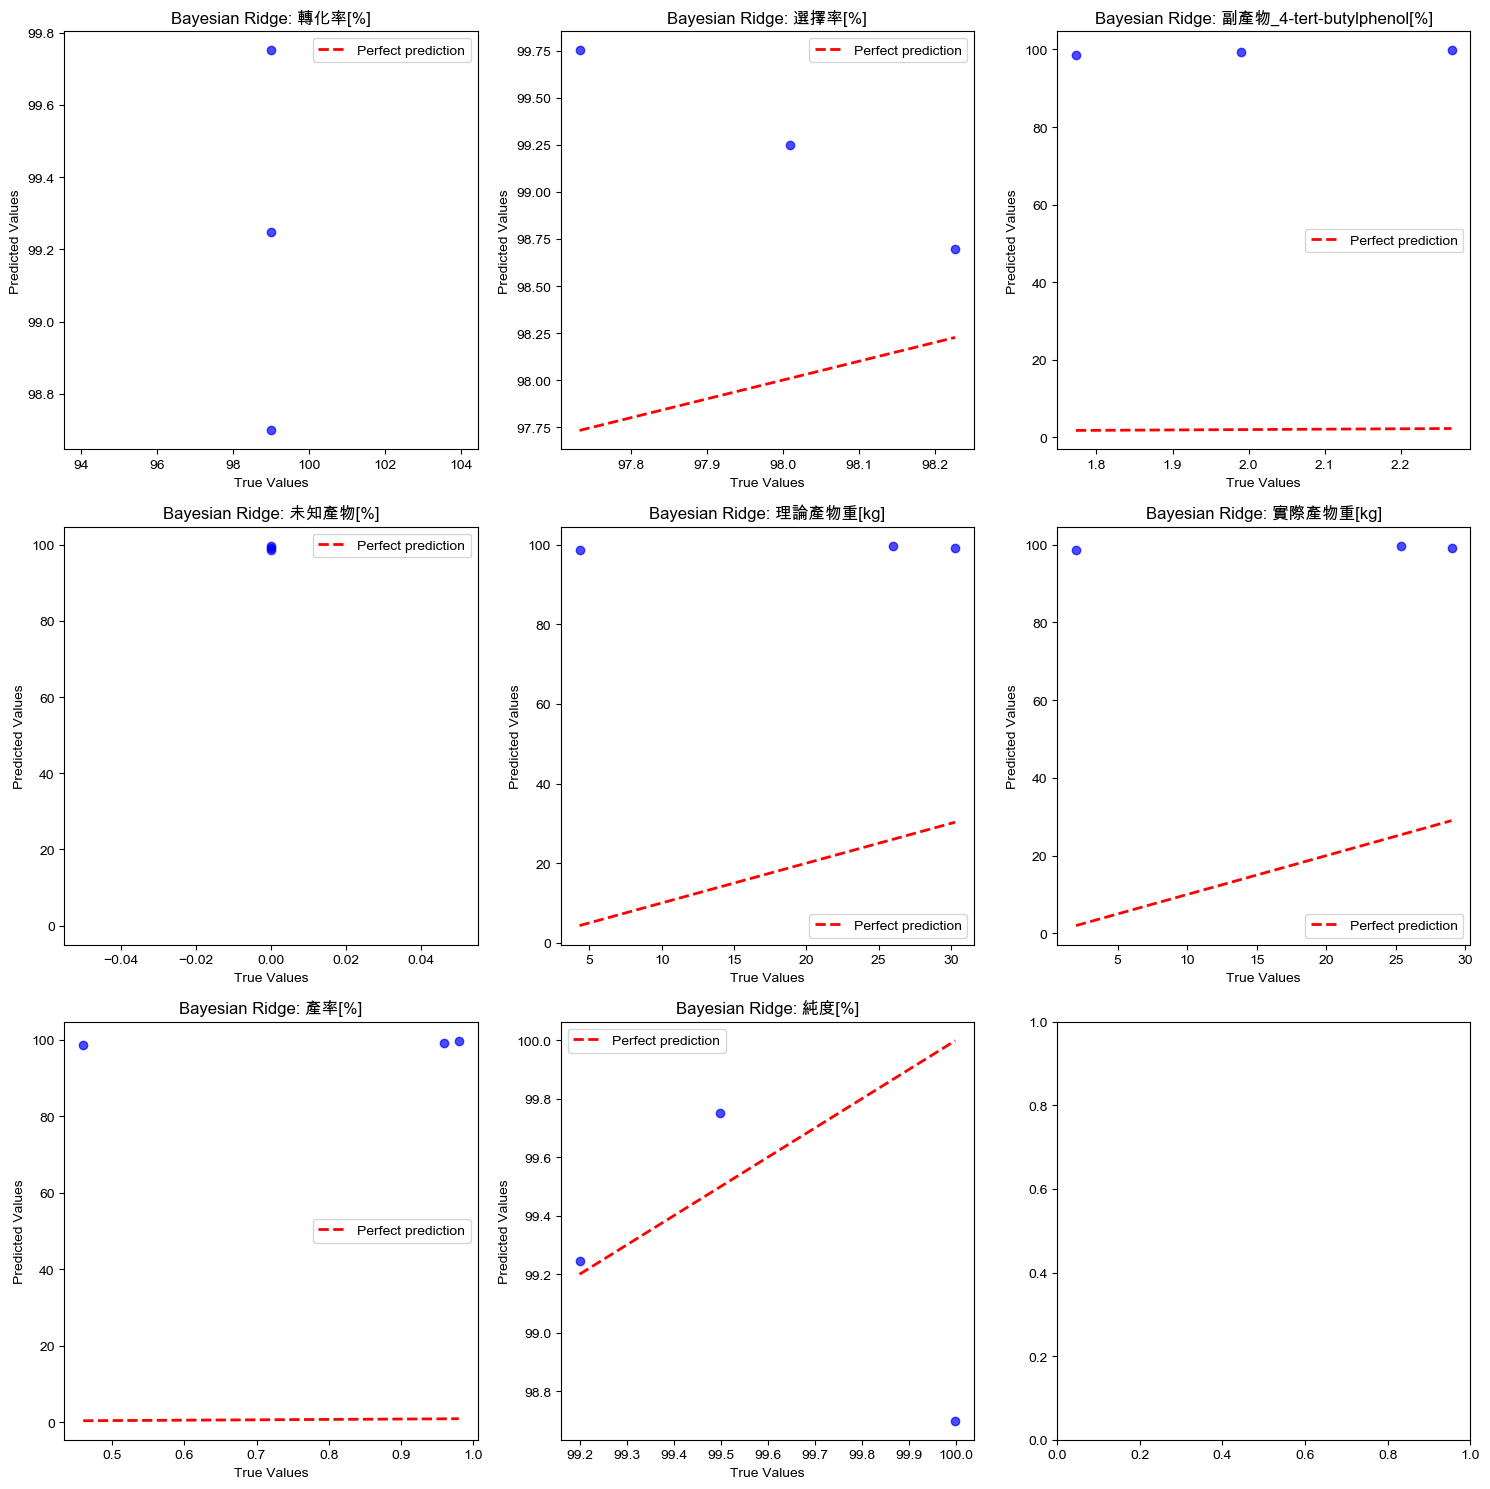

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_fac, y_fac, test_size=0.3, random_state=42)

fac_result = {}

for y_name in y_fac.columns:

    model = BayesianRidge()
    model.fit(X_train, y_train[y_name])

    y_pred = model.predict(X_test)

    # 精度評価
    mse = mean_squared_error(y_test[y_name], y_pred)
    r2 = r2_score(y_test[y_name], y_pred)

    fac_result[y_name] = {
        'mse': mse.round(3),
        'r2': r2.round(3)
    }

print("Factory dataset Hold-Out Performance:")
display(pd.DataFrame(fac_result))

# 実測値 vs 予測値 の可視化
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, y_name in enumerate(y_fac.columns):
    ax = axes[i // 3, i % 3]
    ax.scatter(y_test[y_name], y_pred, color="blue", alpha=0.7)
    ax.plot([y_test[y_name].min(), y_test[y_name].max()],
            [y_test[y_name].min(), y_test[y_name].max()],
            "r--", lw=2, label="Perfect prediction")
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predicted Values")
    ax.set_title(f"Bayesian Ridge: {y_name}")
    ax.legend()
plt.tight_layout()
plt.show()

In [32]:
# Since data is less, try LOO
loo = LeaveOneOut()
fac_loo_result = {}

for y_name in y_fac.columns:
    y_true_all = []
    y_pred_all = []
    
    for train_idx, test_idx in loo.split(X_fac, y_fac[y_name]):
        # LOO split
        X_train, X_test = X_fac.iloc[train_idx], X_fac.iloc[test_idx]
        y_train, y_test = y_fac[y_name].iloc[train_idx], y_fac[y_name].iloc[test_idx]
        
        # モデル学習
        model = BayesianRidge()
        model.fit(X_train, y_train)
        
        # 予測
        y_pred = model.predict(X_test)
        
        # 結果を蓄積
        y_true_all.append(y_test.values[0])
        y_pred_all.append(y_pred[0])
    
    # 全サンプルのLOO予測でスコア算出
    mse = mean_squared_error(y_true_all, y_pred_all)
    r2 = r2_score(y_true_all, y_pred_all)
    
    fac_loo_result[y_name] = {
        'mse': round(mse, 3),
        'r2': round(r2, 3)
    }

print("Factory dataset Leave One Out Performance:")
display(pd.DataFrame(fac_loo_result))

Factory dataset Leave One Out Performance:


,轉化率[%],選擇率[%],副產物_4-tert-butylphenol[%],未知產物[%],理論產物重[kg],實際產物重[kg],產率[%],純度[%]
mse,0.0,7.852,7.852,0.0,0.006,8133.697,2.998,29.739
r2,1.0,-319.887,-319.887,1.0,1.000,-17.914,-90.973,-240.708
